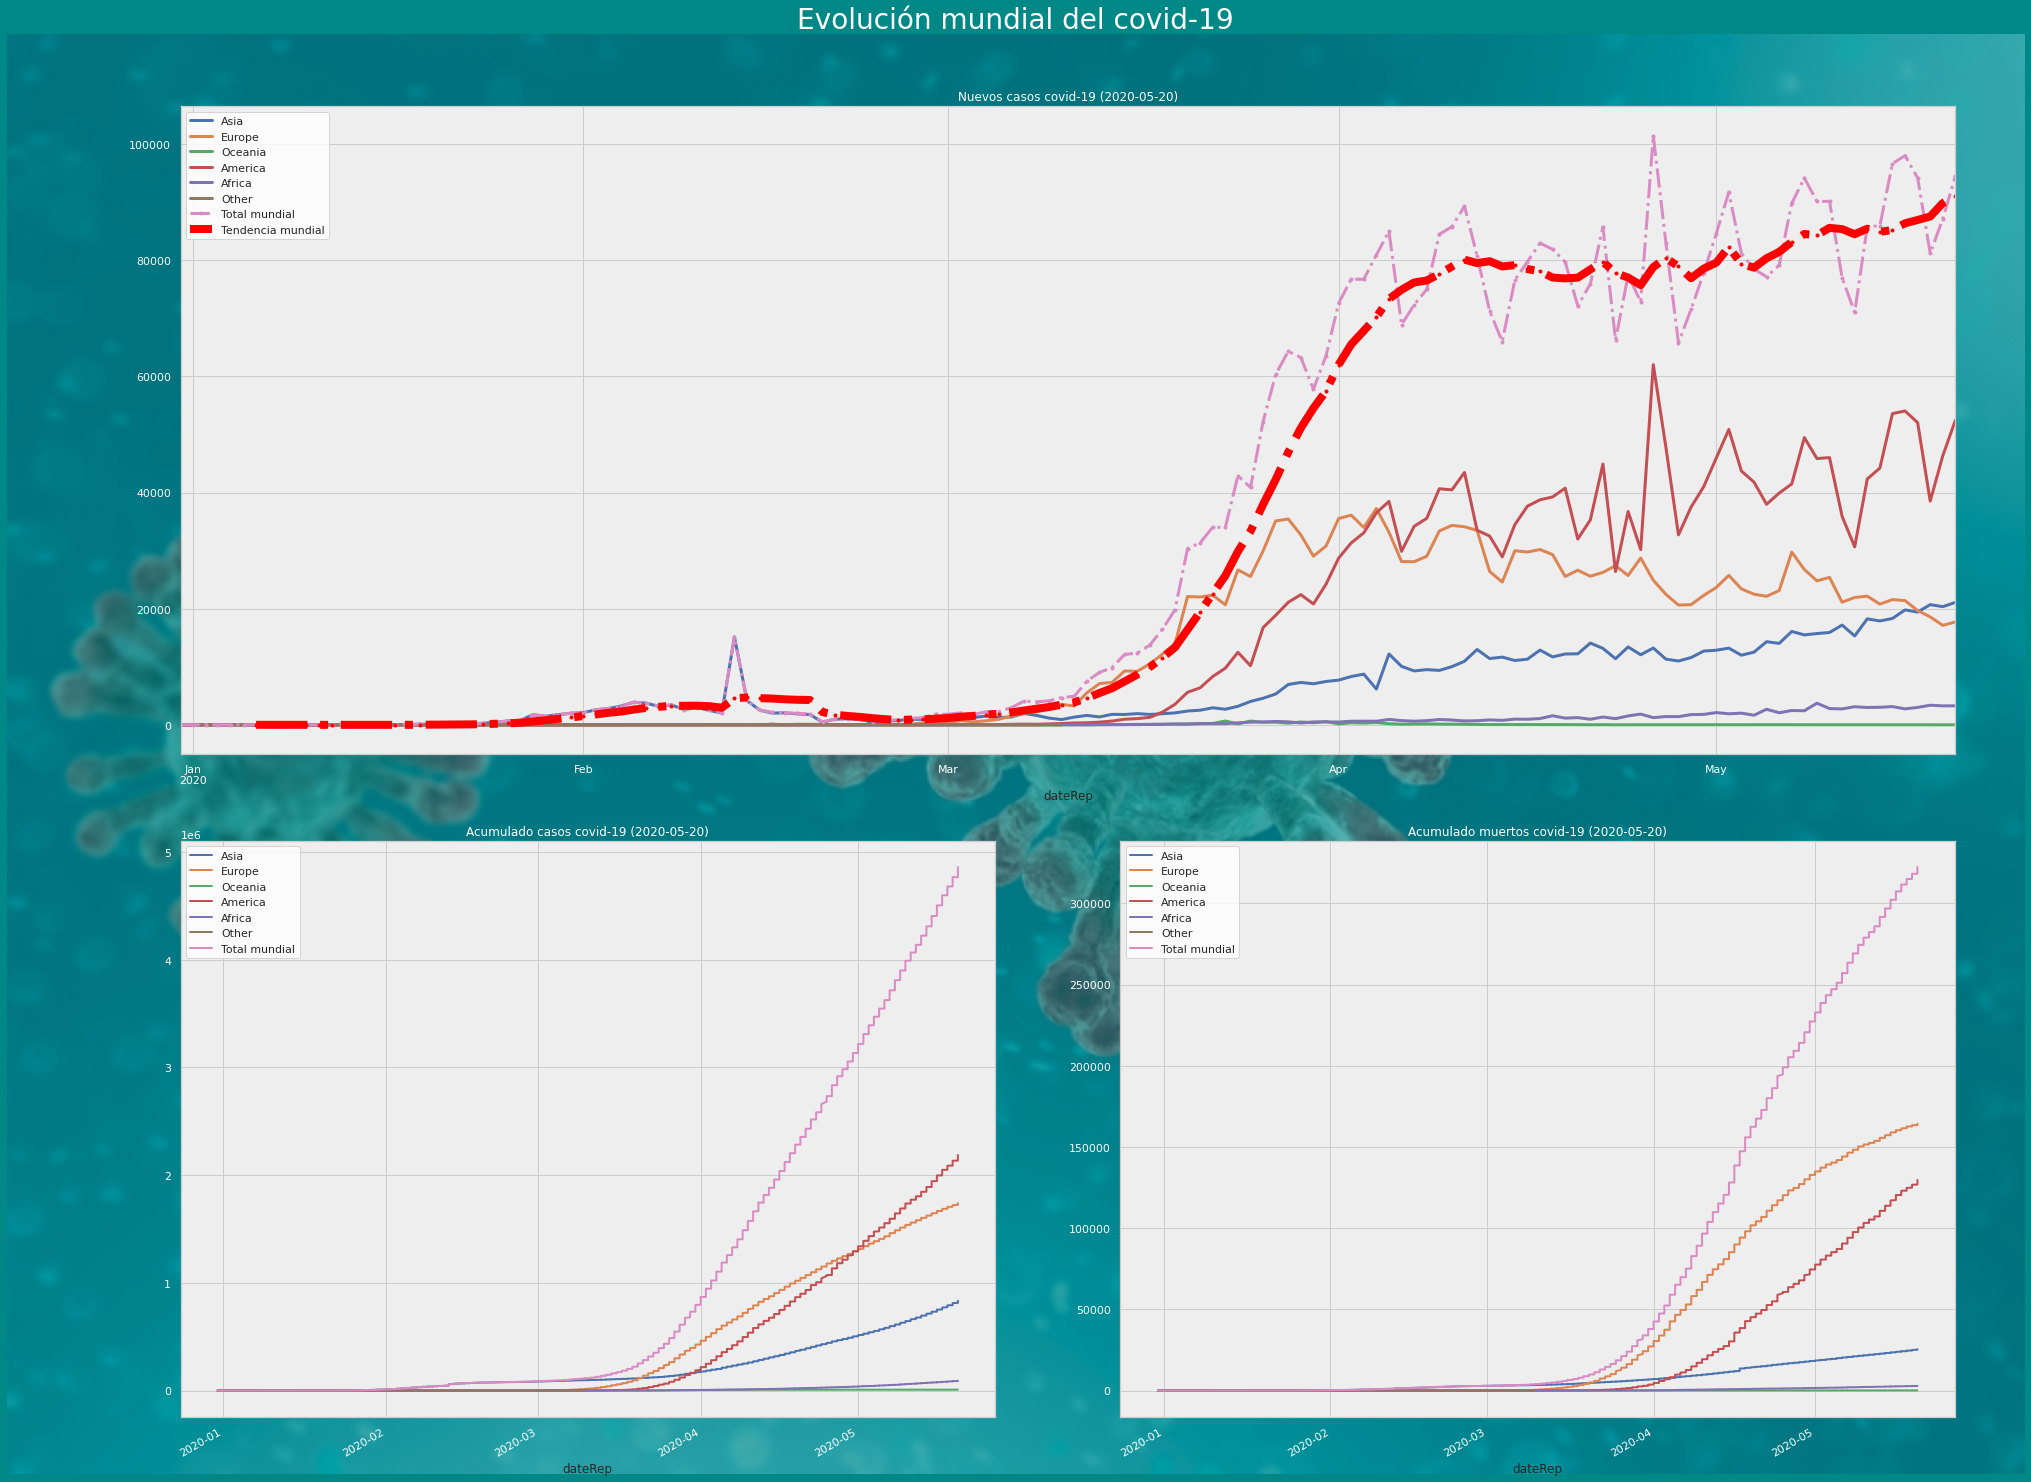

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import sys

hoy     = datetime.date.today()
undia   = datetime.timedelta(days=1)
fichero = hoy.strftime("%Y-%m-%d") 

# Configuración visualización
%matplotlib inline
sns.set()
sns.set(style='whitegrid')
pd.set_option('display.max_row', 1000)

font = {
    'family': 'serif',
    'fontname': 'DejaVu Sans',
    'color':  'white',
    'weight': 'normal',
    'size': 28,
}


hoy     = datetime.date.today()
undia   = datetime.timedelta(days=1)
fichero = hoy.strftime("%Y-%m-%d") 
extension = "xlsx"

# Cargamos datos del Centro Europeo de Prevención de Enfermedades
while True:
    try:
        df = pd.read_excel(
            f"https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{fichero}.{extension}",
            parse_dates=['dateRep'], 
            dayfirst=True,
            index_col='dateRep'            
        )
        break
    except:
        if extension == "xlsx":
            extension = "xls"
        else:
            extension = "xlsx"
            fecha = (fecha - undia)
            fichero = fecha.strftime("%Y-%m-%d") 
        pass


df.sort_index(inplace=True)

fig = plt.figure(figsize=(29, 20), facecolor='#008887')
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Evolución mundial del covid-19', fontdict=font)
ax.axis('off')
im = plt.imread("covid-19-II.jpg")
implot = plt.imshow(im, origin=[0, 0], alpha=0.33)
plt.xticks([])
plt.yticks([])


a = plt.axes([0.1, 0.50, 0.85, 0.45])
a.set_title('', color='w')
a.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases'].groupby(['dateRep']).sum().plot(lw=3, legend=True, label=continente)
df['cases'].groupby(['dateRep']).sum().plot(style='.-.', lw=3, legend=True, label='Total mundial')
df['cases'].groupby(['dateRep']).sum().rolling(7).mean().plot(style='.-.', title=f'Nuevos casos covid-19 ({fichero})', lw=8, legend=True, color='#ff0000', label='Tendencia mundial')



a = plt.axes([0.1, 0.04, .39, .4])
a.set_title('', color='w')
a.patch.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['cases'].cumsum().plot(lw=2, legend=True, label=continente)
df['cases'].cumsum().plot(title=f'Acumulado casos covid-19 ({fichero})', lw=2, legend=True, label='Total mundial')

a = plt.axes([0.55, 0.04, 0.40, 0.4])
a.set_title('', color='w')
a.set_facecolor('#eeeeee')
a.tick_params(which='both', colors='white')
for continente in df['continentExp'].unique():
    df[(df['continentExp'] == continente)]['deaths'].cumsum().plot(lw=2, legend=True, label=continente)
df['deaths'].cumsum().plot(title=f'Acumulado muertos covid-19 ({fichero})', lw=2, legend=True, label='Total mundial')
